# Telecom Churn
- A telecom firm wants to predict whether a particular customer will churn or not.

*Let's start by importing some libraries*

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [163]:
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')

*Let's carry out some basic inspection as follows*

In [164]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [165]:
churn_data.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The column `TotalCharges` should be numeric but instead is given as an object. There, modifying its datatype as follows.

In [166]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].convert_objects(convert_numeric = True)

In [167]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [168]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


One observation is that the column `customerID` is common in the three dataframes. Therefore, we can use this column to combine and create a single dataframe.

In [169]:
df = pd.merge(customer_data, churn_data, how='inner', on='customerID')

In [170]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [171]:
combined_df = pd.merge(internet_data, df, how='inner', on='customerID')
combined_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [172]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

The column `TotalCharges` have 11 missing values. Dropping them as follows.

In [173]:
combined_df.dropna(inplace=True)

In [174]:
combined_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's convert the categorical variables into numeric.

In [175]:
categorical_columns = list(combined_df.select_dtypes(include='object').head().iloc[:, 1:].columns)

In [176]:
categorical_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

These are the categorical columns that needs to be addressed.

In [177]:
combined_df[categorical_columns].nunique()==2

MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
gender               True
Partner              True
Dependents           True
PhoneService         True
Contract            False
PaperlessBilling     True
PaymentMethod       False
Churn                True
dtype: bool

In [178]:
binary = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
combined_df[binary].head()

,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,Yes,No,No,Yes,No
1,No,No,Yes,No,No
2,No,No,Yes,Yes,Yes
3,No,No,No,No,No
4,No,No,Yes,Yes,Yes


These columns contain only `Yes` and `No` catgories.

In [179]:
def func_1(x):
    return x.map({'Yes':1, 'No':0})

In [180]:
combined_df[binary] = combined_df[binary].apply(func_1)

The column `gender` also has two distinct categories.

In [181]:
np.unique(combined_df['gender'])

array(['Female', 'Male'], dtype=object)

In [182]:
combined_df['gender'] = combined_df['gender'].apply(lambda x : 1 if x == 'Male' else 0)

Let's now attend to categorical columns with multiple categories.

In [183]:
categorical = list(combined_df.select_dtypes(include='object').iloc[:, 1:].columns)
categorical

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [184]:
combined_df[categorical].nunique()

MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaymentMethod       4
dtype: int64

In [185]:
dummies = pd.get_dummies(combined_df[categorical])
dummies.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [186]:
dummies.drop(['MultipleLines_No phone service', 'InternetService_No', 'OnlineSecurity_No internet service',
              'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service',
              'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_Month-to-month', 
              'PaymentMethod_Bank transfer (automatic)'], axis=1, inplace=True)

In [187]:
combined_df.drop(categorical, axis=1, inplace=True)

In [188]:
combined_df = pd.concat([dummies, combined_df], axis=1)

In [189]:
combined_df.head()

,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0
1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0
2,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1
3,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0
4,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1


Let's divide our data into train and test sets.

In [190]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(combined_df, train_size=0.7, random_state=100)

Let's carry out transformations on our train set with the columns `tenure`, `MonthlyCharges` and `TotalCharges`.

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [192]:
transform = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_train[transform] = scaler.fit_transform(df_train[transform])
df_train.head()

,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
879,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,9342-VNIMQ,1,0,0,0,0.450704,1,1,0.362189,0.189979,0
5790,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0980-PVMRC,0,0,1,1,0.549296,0,1,0.324378,0.232831,0
6498,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0742-NXBGR,0,0,0,0,0.000000,1,1,0.637313,0.007322,1
880,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,9851-KIELU,1,0,0,0,0.126761,1,1,0.913930,0.118216,1
2784,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,7295-JOMMD,0,0,0,1,0.042254,1,1,0.794527,0.043556,1


In [193]:
X_train = df_train.drop(['Churn', 'customerID'], axis=1)
y_train = df_train['Churn']

Let's use `Recursive Feature Elimination` to select variables.

In [194]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [195]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [196]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MultipleLines_No', True, 1),
 ('MultipleLines_Yes', False, 16),
 ('InternetService_DSL', False, 5),
 ('InternetService_Fiber optic', True, 1),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', False, 13),
 ('OnlineBackup_No', False, 6),
 ('OnlineBackup_Yes', False, 8),
 ('DeviceProtection_No', False, 3),
 ('DeviceProtection_Yes', False, 4),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', False, 12),
 ('StreamingTV_No', False, 14),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_No', False, 9),
 ('StreamingMovies_Yes', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 2),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender', False, 10),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 11),
 ('Dependents', False, 7),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 15),
 ('TotalCharges', True, 

In [197]:
cols = list(X_train.columns[rfe.support_])
cols

['MultipleLines_No',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'TechSupport_No',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Mailed check',
 'SeniorCitizen',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'TotalCharges']

In [198]:
X_train = X_train[cols]

In [199]:
import statsmodels.api as sm

In [200]:
X_train_sm = sm.add_constant(X_train)
model_1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2010.9
Date:                Sat, 18 Jan 2020   Deviance:                       4021.8
Time:                        12:29:15   Pearson chi2:                 6.14e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6569      0.195     -3.375      0

In [201]:
X_train.drop('StreamingMovies_Yes', axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train)
model_2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2012.0
Date:                Sat, 18 Jan 2020   Deviance:                       4024.0
Time:                        12:29:19   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6082      0.192     -3.171      0

In [202]:
y_train_pred = model_2.predict(X_train_sm)

In [203]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn Probability':y_train_pred})
y_train_pred_final.head()

,Churn,Churn Probability
879,0,0.222932
5790,0,0.278623
6498,1,0.692688
880,1,0.494047
2784,1,0.641008


In [204]:
y_train_pred_final['Predicted'] = y_train_pred_final['Churn Probability'].apply(lambda x : 1 if x > 0.5 else 0)

In [205]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])

array([[3271,  364],
       [ 578,  709]], dtype=int64)

In [206]:
round(accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Predicted']), 2)

0.81

It can be observed that the accuracy obtained is pretty good. Let's also calculate the VIF values.

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,tenure,14.41
13,TotalCharges,12.39
11,PhoneService,8.91
1,InternetService_Fiber optic,4.16
6,Contract_Two year,3.39
2,OnlineSecurity_No,2.90
0,MultipleLines_No,2.88
3,TechSupport_No,2.82
12,PaperlessBilling,2.77
4,StreamingTV_Yes,2.49


Removing the column `tenure`

In [208]:
X_train.drop('tenure', axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train)
model_3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2057.0
Date:                Sat, 18 Jan 2020   Deviance:                       4114.0
Time:                        12:30:01   Pearson chi2:                 5.14e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3585      0.173     -7.873      0

In [209]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,PhoneService,8.54
12,TotalCharges,5.23
1,InternetService_Fiber optic,3.74
2,OnlineSecurity_No,2.90
0,MultipleLines_No,2.88
3,TechSupport_No,2.77
11,PaperlessBilling,2.75
6,Contract_Two year,2.51
4,StreamingTV_Yes,2.40
5,Contract_One year,1.76


Dropping `PhoneService`

In [210]:
X_train.drop('PhoneService', axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train)
model_4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2057.0
Date:                Sat, 18 Jan 2020   Deviance:                       4114.0
Time:                        12:30:10   Pearson chi2:                 5.14e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3748      0.134    -10.230      0

In [211]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
11,TotalCharges,5.00
1,InternetService_Fiber optic,3.39
2,OnlineSecurity_No,2.85
3,TechSupport_No,2.71
10,PaperlessBilling,2.63
4,StreamingTV_Yes,2.39
6,Contract_Two year,2.34
0,MultipleLines_No,1.84
5,Contract_One year,1.70
7,PaymentMethod_Credit card (automatic),1.43


In [212]:
y_train_pred = model_4.predict(X_train_sm)

In [213]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Probability':y_train_pred})

In [214]:
y_train_pred_final['Customer ID'] = df_train['customerID']
y_train_pred_final['Predicted'] = y_train_pred_final['Churn_Probability'].apply(lambda x:1 if x>0.5 else 0)

In [215]:
y_train_pred_final.head()

,Churn,Churn_Probability,Customer ID,Predicted
879,0,0.332873,9342-VNIMQ,0
5790,0,0.421298,0980-PVMRC,0
6498,1,0.662230,0742-NXBGR,1
880,1,0.492426,9851-KIELU,0
2784,1,0.659128,7295-JOMMD,1


In [216]:
confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])

array([[3280,  355],
       [ 607,  680]], dtype=int64)

In [217]:
accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])

0.8045509955302722

In [235]:
# Sensitivity
680/(680+607)

0.5283605283605284

In [236]:
# Specificity
3280/(3280+355)

0.9023383768913342

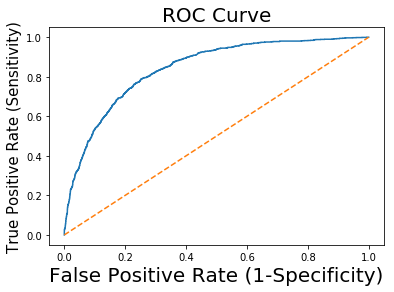

In [218]:
from sklearn.metrics import roc_curve, roc_auc_score
false_pr, true_pr, thresh = roc_curve(y_train, y_train_pred_final['Churn_Probability'])

plt.plot(false_pr, true_pr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=20)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
plt.title('ROC Curve', fontsize=20)
plt.show()

0.5 was randomly chosen as the cut off to make the predictions. Let's take a more informed approach.<br>
*Let's create columns for different values of cut-off and observe the predictions.*

In [219]:
num = [i/10 for i in range(10)]
for i in num:
    y_train_pred_final[i] = y_train_pred_final['Churn_Probability'].apply(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Probability,Customer ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.332873,9342-VNIMQ,0,1,1,1,1,0,0,0,0,0,0
5790,0,0.421298,0980-PVMRC,0,1,1,1,1,1,0,0,0,0,0
6498,1,0.662230,0742-NXBGR,1,1,1,1,1,1,1,1,0,0,0
880,1,0.492426,9851-KIELU,0,1,1,1,1,1,0,0,0,0,0
2784,1,0.659128,7295-JOMMD,1,1,1,1,1,1,1,1,0,0,0


In [220]:
diff_cutoffs = pd.DataFrame(columns = ['Cut off', 'Accuracy', 'Sensitivity', 'Specificity'])
for i in num:
    cm = confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final[i])
    total = sum(sum(cm))
    acc = (cm[0,0]+cm[1,1])/(total)
    sensi = cm[1,1]/(cm[1,1]+cm[1,0])
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    diff_cutoffs.loc[i] = [i, acc, sensi, speci]

In [221]:
diff_cutoffs

,Cut off,Accuracy,Sensitivity,Specificity
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.607273,0.943279,0.488308
0.2,0.2,0.717391,0.843046,0.672902
0.3,0.3,0.768793,0.760684,0.771664
0.4,0.4,0.793783,0.641026,0.847868
0.5,0.5,0.804551,0.528361,0.902338
0.6,0.6,0.795815,0.370629,0.946355
0.7,0.7,0.776107,0.195027,0.981843
0.8,0.8,0.746038,0.036519,0.997249
0.9,0.9,0.738521,0.000000,1.000000


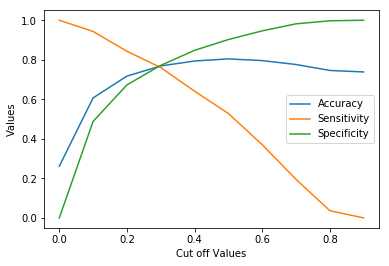

In [222]:
diff_cutoffs.plot.line(x='Cut off', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.xlabel('Cut off Values')
plt.ylabel('Values')
plt.show()

The point of intersection between `Accuracy`, `Sensitivity`, `Specificity` is around 0.3. At this point, fairly good value of all these metrics are achieved.<br>
Therefore, let's choose the cut off to be 0.3 to make our predictions.

In [223]:
y_train_final = pd.DataFrame()
y_train_final['Churn'] = y_train_pred_final['Churn']
y_train_final['Predicted'] = y_train_pred_final['Churn_Probability'].apply(lambda x:1 if x>0.3 else 0)

In [230]:
confusion_matrix(y_train_final['Churn'], y_train_final['Predicted'])

array([[2805,  830],
       [ 308,  979]], dtype=int64)

In [231]:
accuracy_score(y_train_final['Churn'], y_train_final['Predicted'])

0.7687931735067046

Accuracy has dropped a bit but let's also check the values of Sensitivity and Specificity

In [233]:
confm = confusion_matrix(y_train_final['Churn'], y_train_final['Predicted'])
confm

array([[2805,  830],
       [ 308,  979]], dtype=int64)

Let's calculate Sensitivity as:

In [237]:
# Sensitivity
979/(979+308)

0.7606837606837606

In [238]:
# Specificity
2805/(2805+830)

0.7716643741403026

It can be observed that Sensitivity (Total Positive Rate) has increased at the cost of Accuracy and Specificity.

Let's now make the predictions on the test data.

In [247]:
df_test[transform] = scaler.transform(df_test[transform])

In [248]:
df_test.head()

,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
942,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,7567-ECMCM,1,0,0,0,0.323944,1,1,0.612935,0.228729,0
3730,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,6771-XWBDM,0,0,1,0,0.788732,1,1,0.858209,0.681114,1
1761,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,5356-KZCKT,1,0,0,0,0.802817,1,1,0.061692,0.172485,0
2283,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,6140-QNRQQ,1,0,0,0,0.000000,1,1,0.530348,0.006081,1
1872,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9938-PRCVK,0,0,1,1,0.563380,1,0,0.014428,0.090631,0


In [252]:
X_test = df_test.drop(['customerID', 'Churn'], axis=1)
y_test = df_test['Churn']

In [259]:
X_test = X_test[list(vif['Features'])]

In [260]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = model_4.predict(X_test_sm)

In [263]:
y_test_final = pd.DataFrame()
y_test_final['Churn'] = y_test
y_test_final['Churn_Probability'] = y_test_pred

In [265]:
y_test_final['Predicted'] = y_test_final['Churn_Probability'].apply(lambda x : 1 if x>0.3 else 0)
y_test_final['Customer ID'] = df_test['customerID']

In [266]:
y_test_final.head()

,Churn,Churn_Probability,Predicted,Customer ID
942,0,0.738563,1,7567-ECMCM
3730,1,0.617967,1,6771-XWBDM
1761,0,0.105667,0,5356-KZCKT
2283,1,0.733903,1,6140-QNRQQ
1872,0,0.031388,0,9938-PRCVK


In [267]:
confusion_matrix(y_test_final['Churn'], y_test_final['Predicted'])

array([[1113,  415],
       [ 242,  340]], dtype=int64)

Let's now calculate metrics like `Accuracy`, `Sensitivity` and  `Specificity` as follows.

In [268]:
# Accuracy

(1113+340)/(1113+340+415+242)

0.6886255924170616

In [269]:
# Sensitivity

340/(340+242)

0.584192439862543

In [270]:
# Specificity

1113/(1113+415)

0.7284031413612565

It can be observed that the metrics are not that encouraging especially True Positive Rate (Sensitivity). Let's modify the cut off to make our predictions.<br>
- *Since the motive is to predict the churn customers (True Positive Rate), therefore, it's apt to decrease the cut-off even further.*

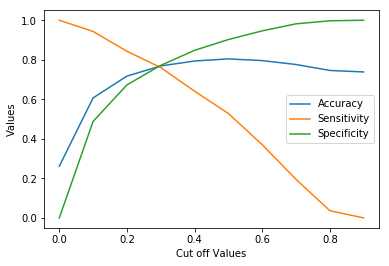

In [286]:
diff_cutoffs.plot.line(x='Cut off', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.xlabel('Cut off Values')
plt.ylabel('Values')
plt.show()

In [288]:
y_test_final['Predicted'] = y_test_final['Churn_Probability'].apply(lambda x:1 if x>0.2 else 0)

In [290]:
confusion_matrix(y_test_final['Churn'], y_test_final['Predicted'])

array([[906, 622],
       [179, 403]], dtype=int64)

In [291]:
# Accuracy
(906+403)/(906+622+179+403)

0.6203791469194313

In [292]:
#Sensitivity
403/(403+179)

0.6924398625429553

In [293]:
#Specificity
906/(906+622)

0.5929319371727748

In [294]:
y_test_final

,Churn,Churn_Probability,Predicted,Customer ID
942,0,0.738563,1,7567-ECMCM
3730,1,0.617967,1,6771-XWBDM
1761,0,0.105667,0,5356-KZCKT
2283,1,0.733903,1,6140-QNRQQ
1872,0,0.031388,0,9938-PRCVK
1970,1,0.453037,1,5445-UTODQ
2532,0,0.022677,0,9825-YCXWZ
1616,0,0.068327,0,6518-PPLMZ
2485,1,0.745081,1,9921-ZVRHG
5914,0,0.139314,0,3099-OONVS
